In [29]:
import pandas as pd
df = pd.read_csv('df_3.csv')
df = df.drop(df.columns[0], axis=1)

In [30]:

df

,MAV,RMS,VAR,WL,ZC,SSC,WAMP,SSI,SD,ASM,...,PF,BW,SE,PermEn,SamPen,FuzzyEn,ApEn,AMAX,PMI,HFMI
0,0.000749,0.001197,0.000001,0.783570,354.7,370.9,824.9,0.001349,0.001197,0.697925,...,172.656250,51.562500,3.660000e-10,0.693058,0.000858,-0.000116,0.002119,0.007650,0.622264,0.088612
1,0.000971,0.001566,0.000002,0.883043,305.6,315.1,687.0,0.001917,0.001566,0.756038,...,211.718750,35.156250,7.780000e-10,0.692949,0.002565,0.000960,0.002683,0.010149,0.226047,0.133873
2,0.001250,0.002758,0.000008,1.363007,379.1,395.3,791.0,0.007511,0.002758,1.230930,...,173.046875,19.531250,2.350000e-09,0.692977,0.019483,0.017839,0.005184,0.024444,0.083882,0.291747
3,0.000756,0.001395,0.000002,0.744630,337.9,348.7,760.2,0.001736,0.001395,0.665652,...,172.265625,38.281250,5.140000e-10,0.693089,0.002265,0.001156,0.002607,0.012045,0.092350,0.264810
4,0.000684,0.001285,0.000002,0.692725,348.7,358.8,757.7,0.001483,0.001285,0.608639,...,188.281250,42.578125,4.420000e-10,0.693038,0.002246,0.001821,0.002597,0.010396,0.091477,0.295575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443,0.017079,0.035129,0.001281,10.176751,191.8,206.1,289.6,0.671450,0.035129,8.949620,...,200.000000,55.078125,3.200000e-07,0.693096,0.614775,0.529215,0.125710,0.182629,0.414768,0.168676
444,0.001857,0.002349,0.000006,1.183963,213.5,219.4,518.2,0.003140,0.002349,1.032638,...,198.437500,53.125000,1.500000e-09,0.692981,0.001439,-0.000320,0.003154,0.007704,0.578510,0.055556
445,0.018708,0.042452,0.001879,15.408637,274.7,294.6,303.6,1.394276,0.042452,13.881702,...,171.875000,35.156250,5.620000e-07,0.693026,0.304919,0.276643,0.411739,0.252674,0.207992,0.243280
446,0.001583,0.002811,0.000008,1.464070,315.6,324.0,726.1,0.006572,0.002811,1.313666,...,168.359375,32.031250,2.430000e-09,0.693053,0.005527,0.005415,0.003919,0.021141,0.125318,0.140808


In [38]:
column_names = df.columns.tolist()
feature_names = column_names[1:]
feature_names

['MAV',
 'RMS',
 'VAR',
 'WL',
 'ZC',
 'SSC',
 'WAMP',
 'SSI',
 'SD',
 'ASM',
 'ASS',
 'CARD',
 'COV',
 'DAMV',
 'DASDV',
 'DVARV',
 'IQR',
 'KURT',
 'LTKEO',
 'MAD',
 'SKEW',
 'PF',
 'BW',
 'SE',
 'PermEn',
 'SamPen',
 'FuzzyEn',
 'ApEn',
 'AMAX',
 'PMI',
 'HFMI']

In [31]:
# 添加一个名为 'label' 的列，并将前80行的值设为 0，其余的设为 1
df['label'] = 0
df.loc[80:, 'label'] = 1
# 将 'label' 列移动到数据集的第一列
df = df[['label'] + [col for col in df.columns if col != 'label']]

In [32]:
df

,label,MAV,RMS,VAR,WL,ZC,SSC,WAMP,SSI,SD,...,PF,BW,SE,PermEn,SamPen,FuzzyEn,ApEn,AMAX,PMI,HFMI
0,0,0.000749,0.001197,0.000001,0.783570,354.7,370.9,824.9,0.001349,0.001197,...,172.656250,51.562500,3.660000e-10,0.693058,0.000858,-0.000116,0.002119,0.007650,0.622264,0.088612
1,0,0.000971,0.001566,0.000002,0.883043,305.6,315.1,687.0,0.001917,0.001566,...,211.718750,35.156250,7.780000e-10,0.692949,0.002565,0.000960,0.002683,0.010149,0.226047,0.133873
2,0,0.001250,0.002758,0.000008,1.363007,379.1,395.3,791.0,0.007511,0.002758,...,173.046875,19.531250,2.350000e-09,0.692977,0.019483,0.017839,0.005184,0.024444,0.083882,0.291747
3,0,0.000756,0.001395,0.000002,0.744630,337.9,348.7,760.2,0.001736,0.001395,...,172.265625,38.281250,5.140000e-10,0.693089,0.002265,0.001156,0.002607,0.012045,0.092350,0.264810
4,0,0.000684,0.001285,0.000002,0.692725,348.7,358.8,757.7,0.001483,0.001285,...,188.281250,42.578125,4.420000e-10,0.693038,0.002246,0.001821,0.002597,0.010396,0.091477,0.295575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443,1,0.017079,0.035129,0.001281,10.176751,191.8,206.1,289.6,0.671450,0.035129,...,200.000000,55.078125,3.200000e-07,0.693096,0.614775,0.529215,0.125710,0.182629,0.414768,0.168676
444,1,0.001857,0.002349,0.000006,1.183963,213.5,219.4,518.2,0.003140,0.002349,...,198.437500,53.125000,1.500000e-09,0.692981,0.001439,-0.000320,0.003154,0.007704,0.578510,0.055556
445,1,0.018708,0.042452,0.001879,15.408637,274.7,294.6,303.6,1.394276,0.042452,...,171.875000,35.156250,5.620000e-07,0.693026,0.304919,0.276643,0.411739,0.252674,0.207992,0.243280
446,1,0.001583,0.002811,0.000008,1.464070,315.6,324.0,726.1,0.006572,0.002811,...,168.359375,32.031250,2.430000e-09,0.693053,0.005527,0.005415,0.003919,0.021141,0.125318,0.140808


In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# 1. 计算每个特征的平均值
mean_values = df.mean()

# 2. 将异常值替换为平均值
df_no_outliers = df.copy()
for column in df_no_outliers.columns:
    column_mean = mean_values[column]
    column_std = df_no_outliers[column].std()
    outlier_indices = (df_no_outliers[column] - column_mean).abs() > 3 * column_std  # 假设使用 3 倍标准差作为异常值的阈值
    df_no_outliers.loc[outlier_indices, column] = column_mean

# 3. 使用 StandardScaler 或 MinMaxScaler 对特征进行归一化
scaler = MinMaxScaler()  # 或者使用 MinMaxScaler()

# 提取特征和标签
X = df_no_outliers.iloc[:, 1:]  # 假设第一列是标签列，后面是特征列
y = df_no_outliers.iloc[:, 0]

# 对特征进行归一化
scaled_features = scaler.fit_transform(X)

# 构建归一化后的 DataFrame
df_standard = pd.DataFrame(scaled_features, columns=X.columns)

# 将标签添加回 DataFrame
df_standard.insert(0, 'label', y)

# 输出归一化后的 DataFrame
df_standard

C:\Users\sjq397\AppData\Local\Temp\ipykernel_17368\1510870738.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.8214285714285714' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_no_outliers.loc[outlier_indices, column] = column_mean
C:\Users\sjq397\AppData\Local\Temp\ipykernel_17368\1510870738.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '820.71875' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_no_outliers.loc[outlier_indices, column] = column_mean


,label,MAV,RMS,VAR,WL,ZC,SSC,WAMP,SSI,SD,...,PF,BW,SE,PermEn,SamPen,FuzzyEn,ApEn,AMAX,PMI,HFMI
0,0.0,0.038520,0.025481,0.002017,0.065403,0.627336,0.635562,0.616777,0.003061,0.025481,...,0.338798,0.580952,0.001809,0.757324,0.006914,0.012794,0.003335,0.030403,0.804040,0.073009
1,0.0,0.085005,0.058080,0.005297,0.091581,0.483937,0.476814,0.453620,0.005946,0.058080,...,0.885246,0.380952,0.007134,0.391254,0.020663,0.024038,0.007889,0.053688,0.282520,0.143227
2,0.0,0.143543,0.163072,0.022090,0.217891,0.698598,0.704979,0.576668,0.034320,0.163072,...,0.344262,0.190476,0.027451,0.485712,0.156926,0.200450,0.028058,0.186878,0.095396,0.388152
3,0.0,0.039928,0.042985,0.003706,0.055155,0.578271,0.572404,0.540227,0.005026,0.042985,...,0.333333,0.419048,0.003722,0.857894,0.018239,0.026091,0.007272,0.071346,0.106542,0.346362
4,0.0,0.024893,0.033282,0.002732,0.041495,0.609813,0.601138,0.537269,0.003742,0.033282,...,0.557377,0.471429,0.002792,0.688064,0.018087,0.033038,0.007194,0.055988,0.105392,0.394089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443,1.0,0.183397,0.139865,0.081867,0.197338,0.151577,0.166714,0.492530,0.088395,0.139865,...,0.721311,0.623810,0.111727,0.881547,0.068770,0.086149,1.000000,0.121097,0.530924,0.197220
444,1.0,0.270953,0.127051,0.015659,0.170773,0.214953,0.204552,0.253904,0.012150,0.127050,...,0.699454,0.600000,0.016465,0.497170,0.011589,0.010662,0.011689,0.030903,0.746449,0.021727
445,1.0,0.183397,0.139865,0.081867,0.197338,0.393692,0.418492,0.000000,0.088395,0.139865,...,0.327869,0.380952,0.111727,0.649086,0.068770,0.086149,0.006787,0.121097,0.258755,0.312959
446,1.0,0.213385,0.167735,0.023032,0.244487,0.513143,0.502134,0.499882,0.029559,0.167735,...,0.278689,0.342857,0.028485,0.738232,0.044513,0.070603,0.017851,0.156099,0.149935,0.153985


(148, 5)

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(sampling_strategy='minority') 
# 分割特征和标签
X = df.drop('label', axis=1)
# X = X_pca
y = df['label']
X_resampled, y_resampled = ros.fit_resample(X, y)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# 初始化和训练随机森林模型
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# 初始化和训练SVM模型
svm_model = SVC()
svm_model.fit(X_train, y_train)

# 初始化和训练XGBoost模型
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

# 在测试集上进行预测并评估性能
rf_accuracy = rf_model.score(X_test, y_test)
svm_accuracy = svm_model.score(X_test, y_test)
xgb_accuracy = xgb_model.score(X_test, y_test)

print("Random Forest Accuracy:", rf_accuracy)
print("SVM Accuracy:", svm_accuracy)
print("XGBoost Accuracy:", xgb_accuracy)


Random Forest Accuracy: 0.9797297297297297
SVM Accuracy: 0.527027027027027
XGBoost Accuracy: 0.9662162162162162


D:\software\anaconda\Lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
D:\software\anaconda\Lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
D:\software\anaconda\Lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
D:\software\anaconda\Lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
D:\software\anaconda\Lib\si

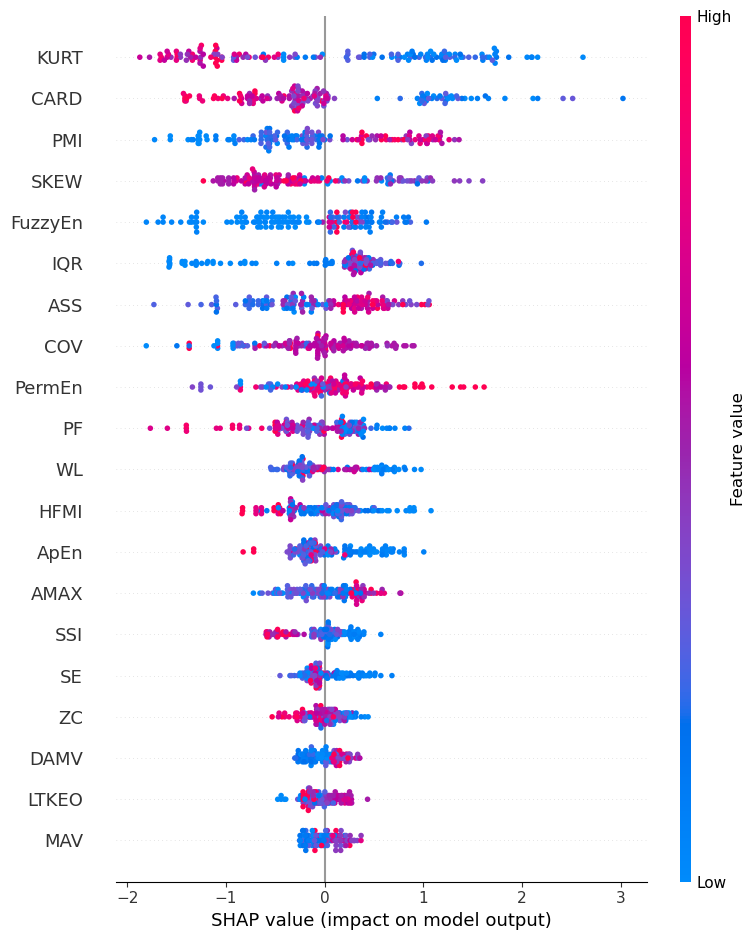

In [46]:
import shap
import matplotlib.pyplot as plt

# 创建 SHAP 解释器对象
explainer = shap.Explainer(xgb_model, X_train)

# 获取 SHAP 值
shap_values = explainer.shap_values(X_test)

# 可视化 SHAP 值
shap.summary_plot(shap_values, X_test, show=False)

# 保存图形
plt.savefig('shap_summary_plot.png', dpi=600)  # 保存为PNG格式，分辨率为300dpi

plt.show()


In [330]:
shap_values.shape

(148, 31)

669    0
33     0
549    0
199    1
264    1
      ..
70     0
329    1
599    0
259    1
349    1
Name: label, Length: 148, dtype: int64

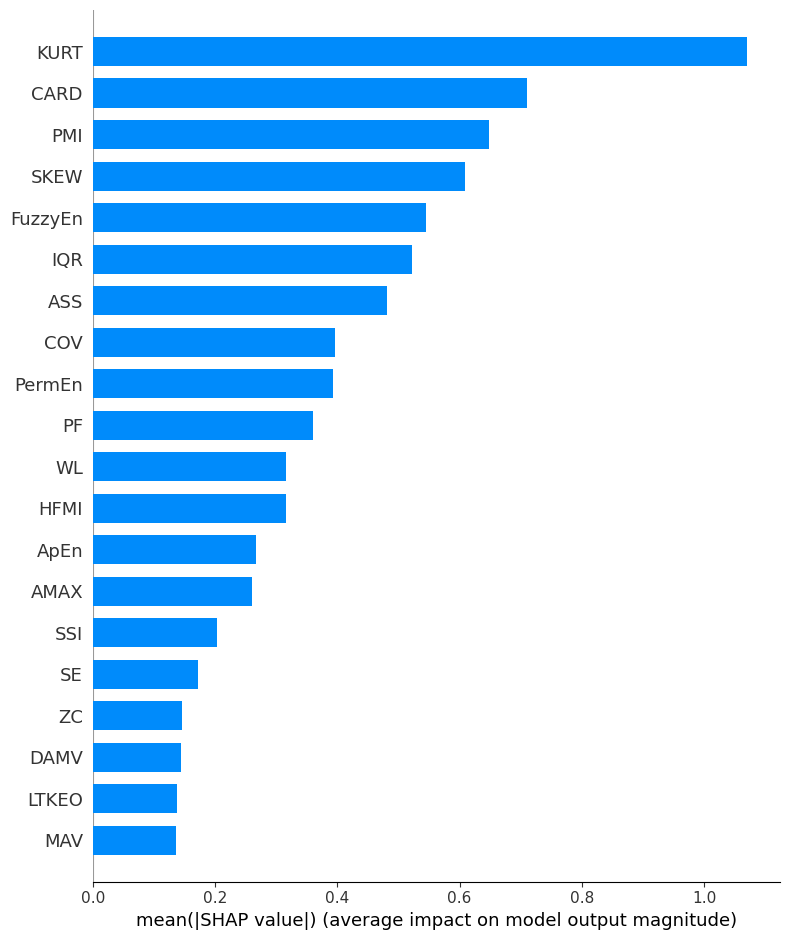

In [47]:
# 可视化 SHAP 值
shap.summary_plot(shap_values, X_test, plot_type="bar", show = False)
# 保存图形
plt.savefig('shap_summary1_plot.png', dpi=600)  # 保存为PNG格式，分辨率为300dpi

plt.show()

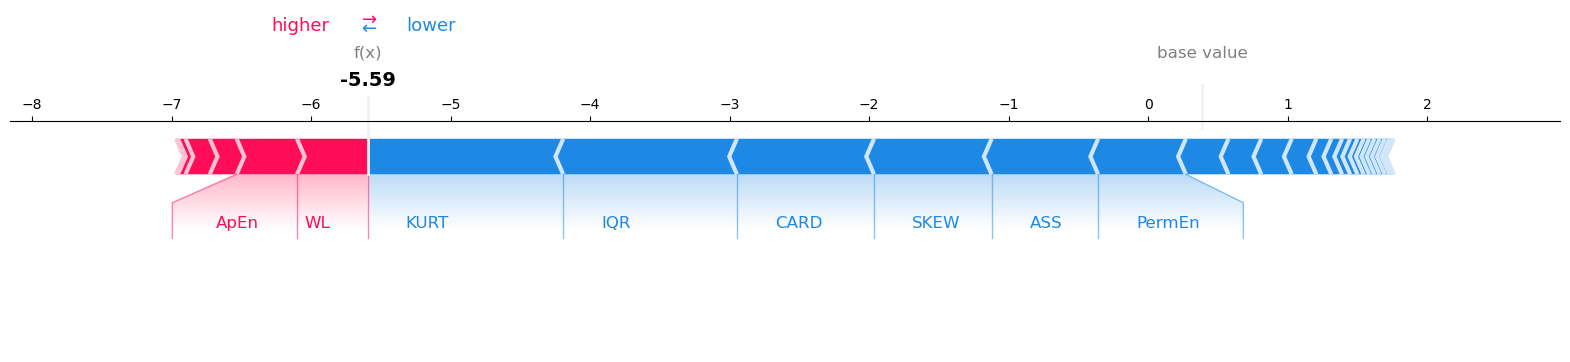

<Figure size 640x480 with 0 Axes>

In [61]:
shap.plots.force(explainer.expected_value, shap_values[1], feature_names=feature_names, matplotlib=True)
# 保存图形
plt.tight_layout()
plt.savefig('shap_mi_plot.jpg', dpi=600)  # 保存为JPEG格式，分辨率为600dpi

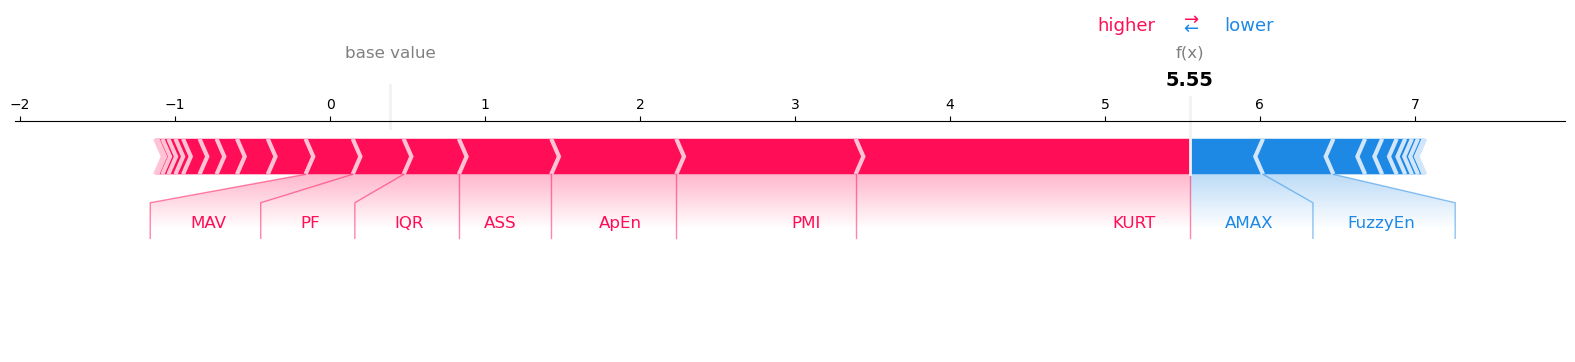

<Figure size 640x480 with 0 Axes>

In [55]:
shap.plots.force(explainer.expected_value, shap_values[4], feature_names=feature_names,matplotlib=True)
# 保存图形
plt.savefig('shap_hea_plot.png', dpi=600)  # 保存为PNG格式，分辨率为300dpi

plt.show()

In [40]:
shap.initjs()
# shap.force_plot(explainer.expected_value, shap_values, X_test)

Feature 'MAV': p-value = 8.370351682812508e-05
Feature 'RMS': p-value = 0.4436255328235086
Feature 'VAR': p-value = 0.06463764812851076
Feature 'WL': p-value = 0.020551617947247466
Feature 'ZC': p-value = 2.8835046380305992e-08
Feature 'SSC': p-value = 3.782973465900741e-08
Feature 'WAMP': p-value = 0.011510854857404221
Feature 'SSI': p-value = 0.03365124929353092
Feature 'SD': p-value = 0.44361855974593734
Feature 'ASM': p-value = 0.019124925333621454
Feature 'ASS': p-value = 0.18142176229127138
Feature 'CARD': p-value = 7.757904588430025e-08
Feature 'COV': p-value = 0.7421187441195162
Feature 'DAMV': p-value = 0.00010346160498020302
Feature 'DASDV': p-value = 0.4393503392758058
Feature 'DVARV': p-value = 0.061135096908159985
Feature 'IQR': p-value = 3.4283743706712745e-09
Feature 'KURT': p-value = 3.316880697716457e-17
Feature 'LTKEO': p-value = 0.3297902544274244
Feature 'MAD': p-value = 8.370094264246628e-05
Feature 'SKEW': p-value = 0.3711141423612807
Feature 'PF': p-value = 0.157

C:\Users\sjq397\AppData\Local\Temp\ipykernel_17368\2709006740.py:42: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(index[i] + bar_width / 2, max(healthy_mean[i], mi_mean[i]), significance, ha='center')


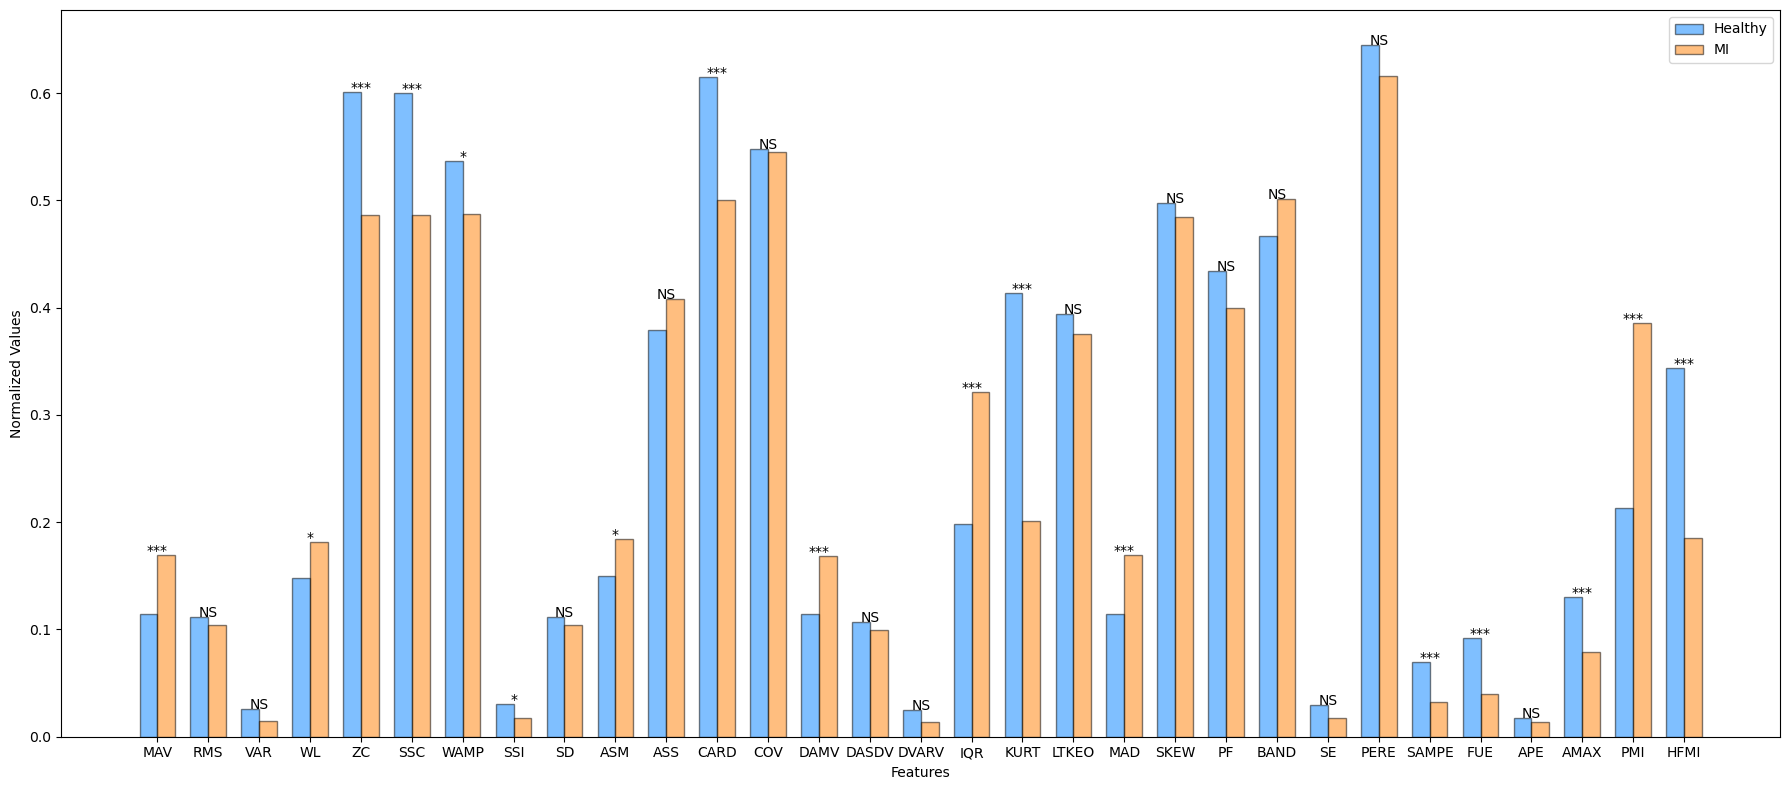

In [16]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy import stats
import matplotlib.pyplot as plt

# 划分特征和标签
X = df_standard.iloc[:, 1:]  # 假设第一列是标签列，后面是特征列
y = df_standard.iloc[:, 0]

# 将数据分为两组：健康人群和 MI 人群
X_healthy = X[y == 0]
X_mi = X[y == 1]

# 计算每个组的特征统计数据（均值和标准差）
healthy_mean = np.mean(X_healthy, axis=0)
mi_mean = np.mean(X_mi, axis=0)
healthy_std = np.std(X_healthy, axis=0)
mi_std = np.std(X_mi, axis=0)

# 执行统计分析（双尾 t 检验）
t_statistic, p_values = stats.ttest_ind(X_healthy, X_mi, alternative='two-sided')

# 可视化比较结果
plt.figure(figsize=(18, 8))
bar_width = 0.35
index = np.arange(len(healthy_mean))

plt.bar(index, healthy_mean, bar_width, label='Healthy', alpha=0.5, color="#0080ff", edgecolor='black')  # 设置健康人群柱子颜色为蓝色，边框颜色为黑色
plt.bar(index + bar_width, mi_mean, bar_width, label='MI', alpha=0.5,color='#ff7f00', edgecolor='black')  # 设置MI人群柱子颜色为红色，边框颜色为黑色

# 标记显著性水平并打印p值
for i, p_value in enumerate(p_values):
    if p_value < 0.001:
        significance = '***'
    elif p_value < 0.01:
        significance = '**'
    elif p_value < 0.05:
        significance = '*'
    else:
        significance = 'NS'
    plt.text(index[i] + bar_width / 2, max(healthy_mean[i], mi_mean[i]), significance, ha='center')
    print(f"Feature '{df.columns[i + 1]}': p-value = {p_value:}")

plt.xlabel('Features')
plt.ylabel('Normalized Values')
# plt.title('Comparison of Feature Distribution between Healthy and MI Groups')
plt.xticks(index + bar_width / 2, df.columns[1:])  # 设置 x 轴刻度
plt.legend()
plt.tight_layout()
plt.show()



In [221]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# 1. 计算每个特征的平均值
mean_values = df.mean()

# 2. 将异常值替换为平均值
df_no_outliers = df.copy()
for column in df_no_outliers.columns:
    column_mean = mean_values[column]
    column_std = df_no_outliers[column].std()
    outlier_indices = (df_no_outliers[column] - column_mean).abs() > 3 * column_std  # 假设使用 3 倍标准差作为异常值的阈值
    df_no_outliers.loc[outlier_indices, column] = column_mean

# 3. 使用 StandardScaler 或 MinMaxScaler 对特征进行归一化
scaler = MinMaxScaler()  # 或者使用 MinMaxScaler()

# 提取特征和标签
X = df_no_outliers.iloc[:, 1:]  # 假设第一列是标签列，后面是特征列
y = df_no_outliers.iloc[:, 0]

# 对特征进行归一化
scaled_features = scaler.fit_transform(X)

# 构建归一化后的 DataFrame
df_standard = pd.DataFrame(scaled_features, columns=X.columns)

# 将标签添加回 DataFrame
df_standard.insert(0, 'label', y)

# 输出归一化后的 DataFrame
df_standard


C:\Users\sjq397\AppData\Local\Temp\ipykernel_26004\400255835.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.8214285714285714' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_no_outliers.loc[outlier_indices, column] = column_mean
C:\Users\sjq397\AppData\Local\Temp\ipykernel_26004\400255835.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '820.71875' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_no_outliers.loc[outlier_indices, column] = column_mean


,label,MAV,RMS,VAR,WL,ZC,SSC,WAMP,SSI,SD,...,SKEW,PF,BAND,SE,PERE,SAMPE,FUE,AMAX,PMI,HFMI
0,0.0,0.038520,0.025481,0.002017,0.065403,0.627336,0.635562,0.616777,0.003061,0.025481,...,0.587577,0.338798,0.580952,0.001809,0.757324,0.006914,0.012794,0.030403,0.804040,0.073009
1,0.0,0.085005,0.058080,0.005297,0.091581,0.483937,0.476814,0.453620,0.005946,0.058080,...,0.489366,0.885246,0.380952,0.007134,0.391254,0.020663,0.024038,0.053688,0.282520,0.143227
2,0.0,0.143543,0.163072,0.022090,0.217891,0.698598,0.704979,0.576668,0.034320,0.163072,...,0.468690,0.344262,0.190476,0.027451,0.485712,0.156926,0.200450,0.186878,0.095396,0.388152
3,0.0,0.039928,0.042985,0.003706,0.055155,0.578271,0.572404,0.540227,0.005026,0.042985,...,0.512208,0.333333,0.419048,0.003722,0.857894,0.018239,0.026091,0.071346,0.106542,0.346362
4,0.0,0.024893,0.033282,0.002732,0.041495,0.609813,0.601138,0.537269,0.003742,0.033282,...,0.481569,0.557377,0.471429,0.002792,0.688064,0.018087,0.033038,0.055988,0.105392,0.394089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443,1.0,0.183397,0.139865,0.081867,0.197338,0.151577,0.166714,0.492530,0.088395,0.139865,...,0.310992,0.721311,0.623810,0.111727,0.881547,0.068770,0.086149,0.121097,0.530924,0.197220
444,1.0,0.270953,0.127051,0.015659,0.170773,0.214953,0.204552,0.253904,0.012150,0.127050,...,0.479000,0.699454,0.600000,0.016465,0.497170,0.011589,0.010662,0.030903,0.746449,0.021727
445,1.0,0.183397,0.139865,0.081867,0.197338,0.393692,0.418492,0.000000,0.088395,0.139865,...,0.224661,0.327869,0.380952,0.111727,0.649086,0.068770,0.086149,0.121097,0.258755,0.312959
446,1.0,0.213385,0.167735,0.023032,0.244487,0.513143,0.502134,0.499882,0.029559,0.167735,...,0.365663,0.278689,0.342857,0.028485,0.738232,0.044513,0.070603,0.156099,0.149935,0.153985


In [199]:
# for i in df_standard["APE"]:
#     print(i)

In [117]:
df1_amax = df1["AMAX"]
df1_pmi = df1["PMI"]
df1_hfmi = df1["HFMI"]

In [212]:
# 对DataFrame进行标准化
scaled_data = scaler.fit_transform(df.iloc[:, 1:])  # 假设第一列是标签列，后面是特征列

# 创建带有标签的DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=df.columns[1:])  # 假设第一列是标签列

# 标准化之后的数据转换为DataFrame
scaled_df = pd.concat([df.iloc[:, 0], scaled_df], axis=1)  # 将标签列添加回DataFrame

# 检测并替换异常值
z_threshold = 2  # 设置Z分数的阈值
for column in scaled_df.columns[1:]:  # 跳过标签列
    column_mean = scaled_df[column].mean()
    column_std = scaled_df[column].std()
    outlier_indices = (scaled_df[column] - column_mean).abs() > z_threshold * column_std
    scaled_df.loc[outlier_indices, column] = column_mean  # 使用均值替换异常值

# 打印替换后的DataFrame
scaled_df

,label,MAV,RMS,VAR,WL,ZC,SSC,WAMP,SSI,SD,...,SKEW,PF,BAND,SE,PERE,SAMPE,FUE,AMAX,PMI,HFMI
0,0,0.010124,0.004835,0.000168,0.016709,0.546426,0.548894,0.688180,0.000253,0.004835,...,0.732239,0.324607,0.580952,0.000113,0.812082,0.001396,0.002307,0.005135,0.354666,0.022280
1,0,0.022343,0.011020,0.000442,0.023397,0.421521,0.411794,0.559937,0.000492,0.011020,...,0.699361,0.391829,0.380952,0.000445,0.528612,0.004173,0.004335,0.009069,0.282520,0.043708
2,0,0.037728,0.030941,0.001845,0.055666,0.608497,0.608845,0.656654,0.002841,0.030941,...,0.692440,0.329843,0.190476,0.001713,0.601756,0.031692,0.036149,0.031567,0.095396,0.118452
3,0,0.010495,0.008156,0.000309,0.014091,0.503689,0.494349,0.628011,0.000416,0.008156,...,0.707008,0.319372,0.419048,0.000232,0.889959,0.003683,0.004705,0.012052,0.106542,0.105699
4,0,0.006543,0.006315,0.000228,0.010601,0.531163,0.519165,0.625686,0.000310,0.006315,...,0.696751,0.534031,0.471429,0.000174,0.758449,0.003653,0.005958,0.009457,0.105392,0.120263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443,1,0.048203,0.026537,0.006836,0.050416,0.443953,0.143980,0.590520,0.007317,0.026537,...,0.639647,0.691099,0.623810,0.006973,0.908275,0.013888,0.015536,0.020455,0.530924,0.060185
444,1,0.071217,0.024106,0.001308,0.043629,0.187230,0.176658,0.402957,0.001006,0.024106,...,0.695891,0.670157,0.600000,0.001028,0.610629,0.002340,0.001923,0.005220,0.746449,0.006630
445,1,0.048203,0.026537,0.006836,0.050416,0.342915,0.361425,0.590520,0.007317,0.026537,...,0.610746,0.314136,0.380952,0.006973,0.728267,0.013888,0.015536,0.020455,0.258755,0.095505
446,1,0.056085,0.031825,0.001923,0.062461,0.446960,0.433661,0.596299,0.002447,0.031825,...,0.657949,0.267016,0.342857,0.001778,0.797297,0.008990,0.012733,0.026368,0.149935,0.046991


## 形态学分析

In [230]:
pip install pymc3

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Note: you may need to restart the kernel to use updated packages.


Feature 'AMAX': p-value = 3.6802091727831423e-08
Feature 'PMI': p-value = 3.5605276861157833e-13
Feature 'HFMI': p-value = 4.0573919476740325e-14


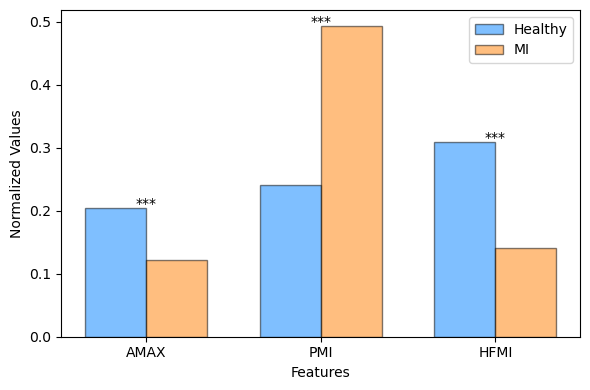

In [286]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# 假设 df 是包含要比较的特征的 DataFrame，其中第一列是标签列，后面是特征列
# 将数据分为两组：健康人群和 MI 人群


def replace_outliers_mean(df, threshold=3):
    df_replaced = df.copy()
    for column in df.columns:
        condition = np.abs(df[column] - df[column].mean()) > threshold * df[column].std()
        mean_value = df[column].mean()
        df_replaced[column][condition] = mean_value
    return df_replaced


X_healthy_no_outliers = replace_outliers_mean(df[df['label'] == 0][['AMAX', 'PMI', 'HFMI']])
X_mi_no_outliers = replace_outliers_mean(df[df['label'] == 1][['AMAX', 'PMI', 'HFMI']])


# 2. 对数据进行 Min-Max 标准化
scaler = MinMaxScaler()
X_healthy_normalized = scaler.fit_transform(X_healthy_no_outliers)
X_mi_normalized = scaler.transform(X_mi_no_outliers)

# 3. 双尾检验
def perform_two_tailed_test(group1, group2):
    # 执行双尾 t 检验
    t_statistic, p_value = stats.ttest_ind(group1, group2)
    return p_value

p_values = []
for i in range(X_healthy_normalized.shape[1]):
    p_value = perform_two_tailed_test(X_healthy_normalized[:, i], X_mi_normalized[:, i])
    p_values.append(p_value)

# 打印每个特征的 p 值
for i, feature in enumerate(X_healthy_no_outliers.columns):
    print(f"Feature '{feature}': p-value = {p_values[i]}")

# 绘制特征值的柱状图，并在柱顶显示 p 值和添加误差线
bar_width = 0.35
index = np.arange(X_healthy_normalized.shape[1])

plt.figure(figsize=(6, 4))

plt.bar(index, X_healthy_normalized.mean(axis=0), bar_width, label='Healthy', alpha=0.5, color="#0080ff", edgecolor="black", error_kw=dict(lw=0.5, capsize=5))
plt.bar(index + bar_width, X_mi_normalized.mean(axis=0), bar_width, label='MI', alpha=0.5, color='#ff7f00', edgecolor='black', error_kw=dict(lw=0.5, capsize=5))

for i, p_value in enumerate(p_values):
    significance = '***' if p_value < 0.01 else ''
    plt.text(index[i] + bar_width / 2, max(X_healthy_normalized.mean(axis=0)[i], X_mi_normalized.mean(axis=0)[i]), significance, ha='center')

plt.xlabel('Features')
plt.ylabel('Normalized Values')
# plt.title('Comparison of Feature Distribution between Healthy and MI Groups (Normalized)')
plt.xticks(index + bar_width / 2, X_healthy_no_outliers.columns)
plt.legend()
plt.tight_layout()
plt.show()


In [239]:
from sklearn.preprocessing import StandardScaler

# 假设 df 是包含要标准化的特征的 DataFrame，其中第一列是标签列，后面是特征列
# 将数据分为两组：健康人群和 MI 人群
X_healthy_no_outliers = df[df['label'] == 0][['AMAX', 'PMI', 'HFMI']]
X_mi_no_outliers = df[df['label'] == 1][['AMAX', 'PMI', 'HFMI']]

# 初始化 StandardScaler 对象
scaler = StandardScaler()

# 对健康人群和 MI 人群的数据分别进行 Z-Score 标准化
X_healthy_normalized = scaler.fit_transform(X_healthy_no_outliers)
X_mi_normalized = scaler.fit_transform(X_mi_no_outliers)


## 过采样

In [264]:
import pandas as pd

# 假设 X 是特征数据，y 是标签数据
X = df.iloc[:, 1:]  # 特征数据
y = df.iloc[:, 0]   # 标签数据

ros = RandomOverSampler(sampling_strategy='minority') 
X_resampled, y_resampled = ros.fit_resample(X, y)

# 将过采样后的数据重新组合成DataFrame
resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
resampled_df.insert(0, 'label', y_resampled)  # 插入标签列

# 输出过采样后的DataFrame
resampled_df


,label,MAV,RMS,VAR,WL,ZC,SSC,WAMP,SSI,SD,...,SKEW,PF,BAND,SE,PERE,SAMPE,FUE,AMAX,PMI,HFMI
0,0,0.000749,0.001197,0.000001,0.783570,354.7,370.9,824.9,0.001349,0.001197,...,0.001010,172.656250,51.562500,3.660000e-10,0.693058,0.000858,-0.000116,0.007650,0.622264,0.088612
1,0,0.000971,0.001566,0.000002,0.883043,305.6,315.1,687.0,0.001917,0.001566,...,0.000017,211.718750,35.156250,7.780000e-10,0.692949,0.002565,0.000960,0.010149,0.226047,0.133873
2,0,0.001250,0.002758,0.000008,1.363007,379.1,395.3,791.0,0.007511,0.002758,...,-0.000193,173.046875,19.531250,2.350000e-09,0.692977,0.019483,0.017839,0.024444,0.083882,0.291747
3,0,0.000756,0.001395,0.000002,0.744630,337.9,348.7,760.2,0.001736,0.001395,...,0.000248,172.265625,38.281250,5.140000e-10,0.693089,0.002265,0.001156,0.012045,0.092350,0.264810
4,0,0.000684,0.001285,0.000002,0.692725,348.7,358.8,757.7,0.001483,0.001285,...,-0.000062,188.281250,42.578125,4.420000e-10,0.693038,0.002246,0.001821,0.010396,0.091477,0.295575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,0,0.000999,0.001643,0.000003,1.015403,345.8,359.5,788.3,0.002392,0.001643,...,-0.001064,193.750000,58.593750,6.870000e-10,0.693038,0.000905,0.000058,0.014628,0.192763,0.174335
732,0,0.000601,0.001898,0.000004,0.752181,427.7,441.5,771.4,0.004093,0.001898,...,0.000170,193.359375,61.718750,1.440000e-09,0.693035,0.030072,0.028528,0.024334,0.025345,0.649912
733,0,0.000889,0.001987,0.000004,0.874981,331.4,346.6,672.9,0.003366,0.001987,...,0.000511,195.312500,12.500000,1.080000e-09,0.692986,0.009347,0.008468,0.016524,0.051766,0.326139
734,0,0.000910,0.001851,0.000004,0.761363,295.1,305.1,639.1,0.002694,0.001851,...,0.000130,164.453125,18.359375,1.370000e-09,0.693084,0.004696,0.003737,0.013887,0.070476,0.299038
